Data Analytics Task— CodeAlpha
## sanketshakya23@gmail.com

# Import Tools

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Dataset

In [5]:
import csv

# Get the current field size limit
original_field_size_limit = csv.field_size_limit()

# Increase the field size limit (e.g., to 10MB)
csv.field_size_limit(1024 * 1024 * 10)

try:
    # Read the CSV, skipping bad lines that might cause 'unexpected end of data' or other parsing issues
    df = pd.read_csv("zomato.csv", engine='python', on_bad_lines='skip')
finally:
    # Reset the field size limit to its original value
    csv.field_size_limit(original_field_size_limit)


# Ask Meaningful Questions

In [6]:
#Which restaurants have the highest ratings?

df_ratings['rate'] = df_ratings['rate'].str.replace('/5', '').replace('NEW', np.nan).replace('-', np.nan)
df_ratings['rate'] = pd.to_numeric(df_ratings['rate'], errors='coerce')

df_ratings.dropna(subset=['rate'], inplace=True)

# Sort by rating in descending order and display the top restaurants
top_rated_restaurants = df_ratings.sort_values(by='rate', ascending=False)
display(top_rated_restaurants[['name', 'rate', 'address', 'cuisines']].head(10))

,name,rate,address,cuisines
4944,Byg Brewski Brewing Company,4.9,"Behind MK Retail, Sarjapur Road, Bangalore","Continental, North Indian, Italian, South Indi..."
8275,Asia Kitchen By Mainland China,4.9,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...","Asian, Chinese, Thai, Momos"
3921,Byg Brewski Brewing Company,4.9,"Behind MK Retail, Sarjapur Road, Bangalore","Continental, North Indian, Italian, South Indi..."
14740,Belgian Waffle Factory,4.9,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Desserts
17877,Belgian Waffle Factory,4.9,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Desserts
7888,Flechazo,4.9,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...","Asian, Mediterranean, North Indian, BBQ"
9099,Asia Kitchen By Mainland China,4.9,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...","Asian, Chinese, Thai, Momos"
8260,AB's - Absolute Barbecues,4.9,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...","European, Mediterranean, North Indian, BBQ"
18496,Milano Ice Cream,4.9,"460, 2nd Cross, Krishna Temple Road, Indiranag...","Ice Cream, Desserts"
7118,Punjab Grill,4.9,"Ground Floor, Forum Shantiniketan, Whitefield ...",North Indian


In [8]:
##Which area has the most restaurants?
# Count the number of restaurants per area based on 'listed_in(city)'
restaurants_per_area = df['listed_in(city)'].value_counts().reset_index()
restaurants_per_area.columns = ['Area', 'Number of Restaurants']

# Display the areas with the most restaurants
display(restaurants_per_area.head(10))


,Area,Number of Restaurants
0,BTM,3279
1,Jayanagar,2371
2,JP Nagar,2096
3,Indiranagar,1860
4,Church Street,1827
5,Brigade Road,1769
6,HSR,1741
7,Bannerghatta Road,1617
8,Brookefield,1518
9,Basavanagudi,1266


# Look at the Data Structure

In [9]:
df.head()      # first 5 rows
df.shape       # number of rows & columns
df.info()      # datatype of each column
df.describe()  # summary of numbers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24718 entries, 0 to 24717
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          24718 non-null  object 
 1   address                      24717 non-null  object 
 2   name                         24717 non-null  object 
 3   online_order                 24717 non-null  object 
 4   book_table                   24717 non-null  object 
 5   rate                         21048 non-null  object 
 6   votes                        24717 non-null  float64
 7   phone                        24221 non-null  object 
 8   location                     24713 non-null  object 
 9   rest_type                    24611 non-null  object 
 10  dish_liked                   11025 non-null  object 
 11  cuisines                     24700 non-null  object 
 12  approx_cost(for two people)  24628 non-null  object 
 13  reviews_list    

,votes
count,24717.000000
mean,253.576162
std,706.773621
min,0.000000
25%,6.000000
50%,39.000000
75%,184.000000
max,16345.000000


# Clean the Data

In [10]:
df.isnull().sum()


,0
url,0
address,1
name,1
online_order,1
book_table,1
rate,3670
votes,1
phone,497
location,5
rest_type,107


In [11]:
df.drop_duplicates(inplace=True)



In [12]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)


In [13]:
# Check for duplicate rows after removal
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


In [14]:
# Check for missing values after previous cleaning steps
print("\nMissing values per column after cleaning:\n")
display(df.isnull().sum())


Missing values per column after cleaning:



,0
url,0
address,1
name,1
online_order,1
book_table,1
rate,3670
votes,1
phone,497
location,5
rest_type,107


In [15]:
##What are the most common cuisines?
df['cuisines'].value_counts().head(10)


,count
cuisines,
North Indian,1400
"North Indian, Chinese",1180
South Indian,899
"Bakery, Desserts",474
Biryani,412
"South Indian, North Indian, Chinese",397
Fast Food,381
Cafe,347
Bakery,340


# Look for Patterns & Trends

In [16]:
##Which areas have the most restaurants?
df['location'].value_counts().head(10)


,count
location,
BTM,2420
JP Nagar,2209
Jayanagar,1683
HSR,1534
Bannerghatta Road,1533
Electronic City,1248
Indiranagar,1193
Banashankari,899
Bellandur,715


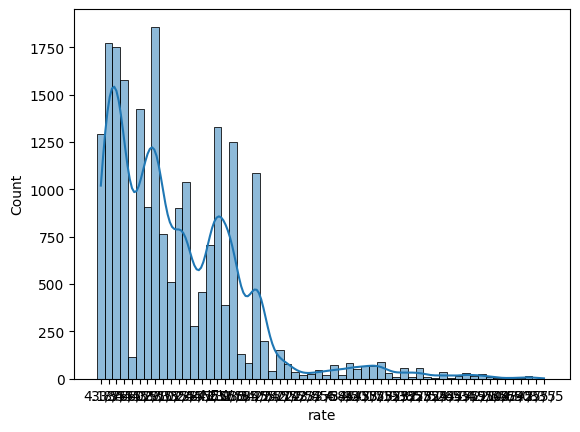

In [17]:
##How are restaurants rated?
sns.histplot(df['rate'], kde=True)
plt.show()


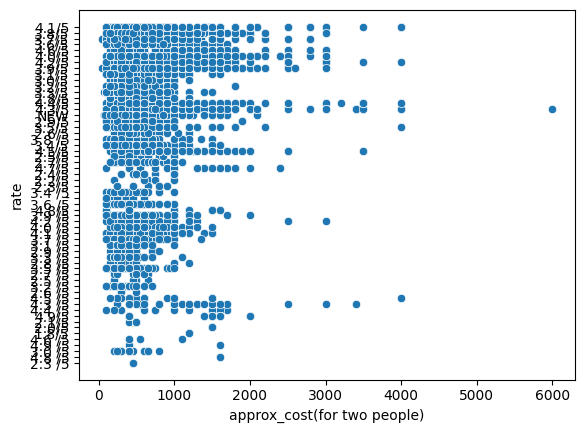

In [18]:
##Does cost affect rating?
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.show()


###  Visualizations — Top locations & cuisines

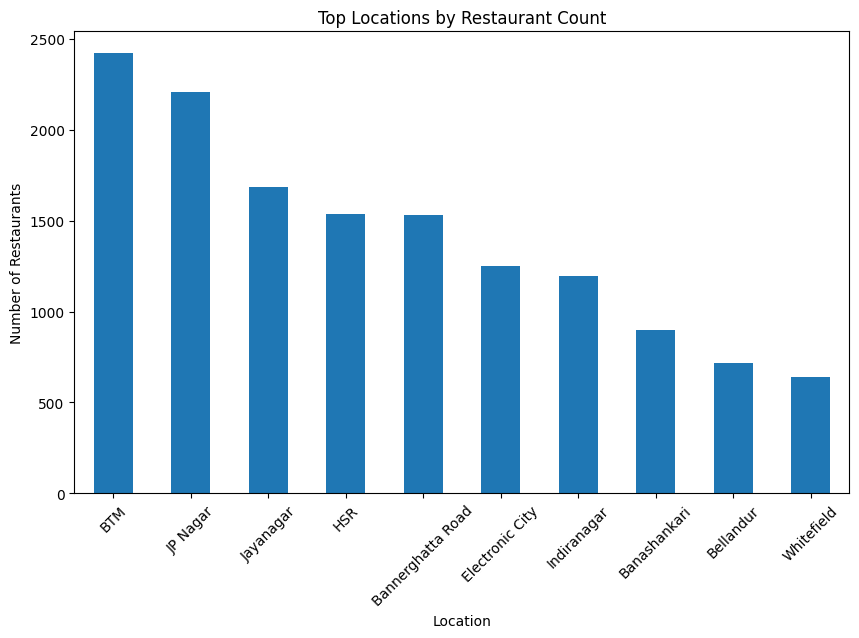

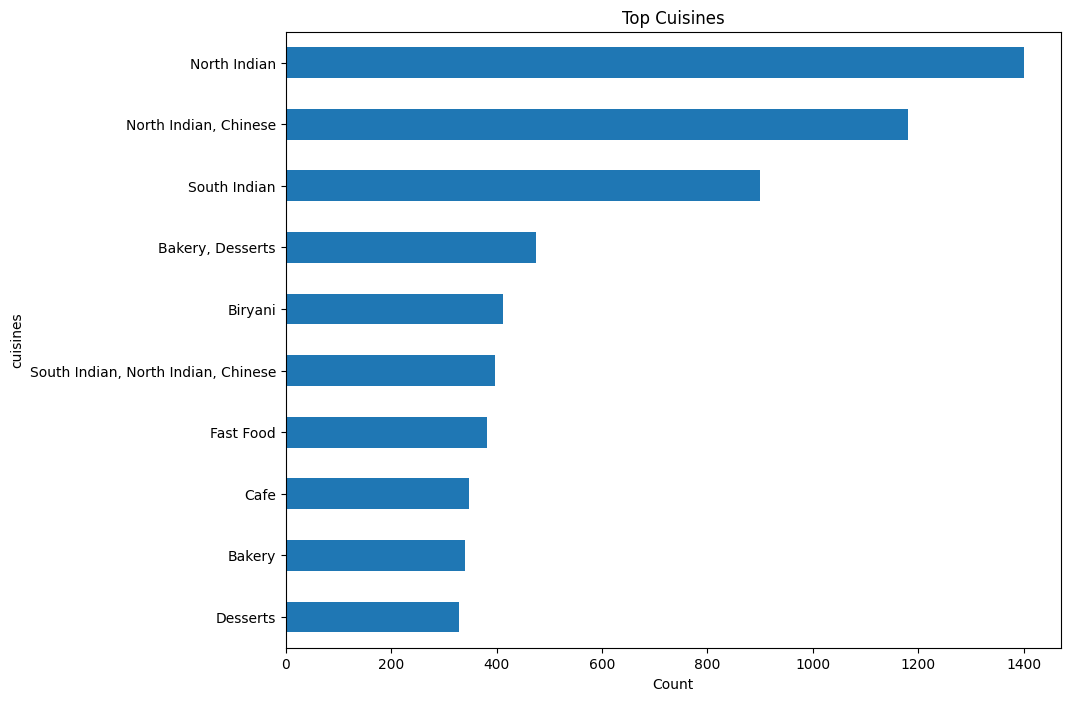

In [22]:
plt.figure(figsize=(10,6))
if 'location' in df.columns:
    top_locations = df['location'].value_counts().head(10)
    top_locations.plot(kind='bar')
    plt.title('Top Locations by Restaurant Count')
    plt.ylabel('Number of Restaurants')
    plt.xlabel('Location')
    plt.xticks(rotation=45)
    plt.show()

plt.figure(figsize=(10,8))
if 'cuisines' in df.columns:
    top_cuisines = df['cuisines'].value_counts().head(10)
    top_cuisines.sort_values().plot(kind='barh')
    plt.title('Top Cuisines')
    plt.xlabel('Count')
    plt.show()

##  Does online ordering relate to ratings?
# We'll compare ratings for restaurants that accept online orders vs those that do not.

In [23]:
if 'online_order_bool' in df.columns and 'rate_clean' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='online_order_bool', y='rate_clean', data=df)
    plt.title('Online Order vs Rating')
    plt.xlabel('Online Order Available')
    plt.ylabel('Rating')
    plt.show()
    print(df.groupby('online_order_bool')['rate_clean'].mean())
else:
    print('Required columns not found for this analysis.')

Required columns not found for this analysis.


##  Grouped insights — top-rated cuisines & locations
# Find average rating by cuisine and by location.

In [24]:
# average rating per location (top locations only)
if 'location' in df.columns and 'rate_clean' in df.columns:
    rating_by_loc = df.groupby('location')['rate_clean'].mean().dropna().sort_values(ascending=False).head(20)
    display(rating_by_loc)

# rating by cuisine (explode cuisines)
if 'cuisines' in df.columns and 'rate_clean' in df.columns:
    tmp = df[['cuisines','rate_clean']].dropna()
    tmp = tmp.assign(cuisine=tmp['cuisines'].str.split(',')).explode('cuisine')
    tmp['cuisine'] = tmp['cuisine'].str.strip()
    rating_by_cuisine = tmp.groupby('cuisine')['rate_clean'].mean().dropna().sort_values(ascending=False).head(20)
    display(rating_by_cuisine)

##  Detect data issues & outliers
# List potential data problems and show rows with suspicious values.

In [26]:
# Rows with missing critical fields
critical = [c for c in ['name','location','cuisines'] if c in df.columns]
if critical:
    missing_critical = df[df[critical].isnull().any(axis=1)]
    print('Rows with missing critical fields:', missing_critical.shape[0])
    display(missing_critical.head())
else:
    print('No critical columns found to check.')


# Highly unusual ratings or costs
if 'rate_clean' in df.columns:
    print('\nRows with rate > 5 (suspicious):')
    display(df[df['rate_clean']>5].head())

if 'approx_cost_for_two' in df.columns:
    print('\nRows with extremely high cost (top 10):')
    display(df[['name','location','approx_cost_for_two']].sort_values('approx_cost_for_two', ascending=False).head(10))

Rows with missing critical fields: 18


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
438,https://www.zomato.com/bangalore/the-house-of-...,"85, 7th Main Road, Nandakumar Layout, Ramanjan...",The House Of Vadapav,Yes,No,NaN,0.0,+91 8884563131\r\n+91 9945435158,Banashankari,Quick Bites,NaN,NaN,150.0,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",[],Delivery,Banashankari
440,https://www.zomato.com/bangalore/lassi-spot-ku...,"728, 24th Cross, Opposite SBI Bank, 1st Stage,...",Lassi Spot,Yes,No,3.3/5,4.0,+91 8050567900,Kumaraswamy Layout,Beverage Shop,NaN,NaN,100.0,[],[],Delivery,Banashankari
759,https://www.zomato.com/bangalore/the-house-of-...,"85, 7th Main Road, Nandakumar Layout, Ramanjan...",The House Of Vadapav,Yes,No,NaN,0.0,+91 8884563131\r\r\n+91 9945435158,Banashankari,Quick Bites,NaN,NaN,150.0,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",[],Dine-out,Banashankari
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
4037,https://www.zomato.com/bangalore/chai-point-ma...,"77 Town, Building No 3, Divya Shree Building, ...",Chai Point,Yes,No,NaN,0.0,+91 9738271431,Marathahalli,"Beverage Shop, Quick Bites",NaN,NaN,200.0,[],[],Delivery,Bellandur


# Save cleaned dataset and key results

In [27]:
OUT_DIR = '/content/eda_outputs'
import os
os.makedirs(OUT_DIR, exist_ok=True)

# Save cleaned main file
clean_path = os.path.join(OUT_DIR, 'zomato_cleaned.csv')
df.to_csv(clean_path, index=False)
print('Saved cleaned dataset to', clean_path)

# Save top lists if they exist
if 'top_locations' in globals():
    top_locations.to_csv(os.path.join(OUT_DIR, 'top_locations.csv'))
if 'top_cuisines' in globals():
    top_cuisines.to_csv(os.path.join(OUT_DIR, 'top_cuisines.csv'))

print('\nSaved outputs to', OUT_DIR)

Saved cleaned dataset to /content/eda_outputs/zomato_cleaned.csv

Saved outputs to /content/eda_outputs
